### Streaming
Methods: .stream() and astream()

- These methods are sync and async methods for streaming back results.

Additional parameters in streaming modes for graph state

- **values** : This streams the full state of the graph after each node is called.
- **updates** : This streams updates to the state of the graph after each node is called.

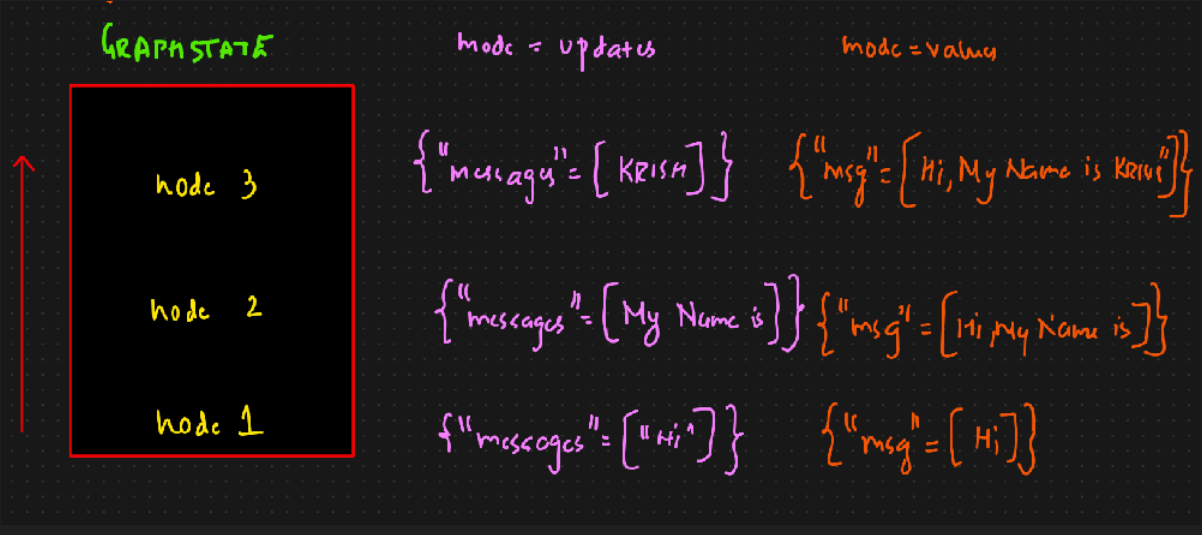

#### Streaming The Responses With Stream Method

### Implementing simple Chatbot Using LangGraph

In [3]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

/Users/binod.kafle/Documents/personal/learning/agentic_ai/.venv/lib/python3.14/site-packages/langchain_core/_api/deprecation.py:26: UserWarning: Core Pydantic V1 functionality isn't compatible with Python 3.14 or greater.
  from pydantic.v1.fields import FieldInfo as FieldInfoV1


In [4]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [5]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [8]:
from langchain_groq import ChatGroq

llm_groq=ChatGroq(model="openai/gpt-oss-120b")
llm_groq.invoke("Hey I am Binod and i like to play cricket")

AIMessage(content="Hey Binod! 👋 Great to meet a fellow cricket enthusiast.  \n\nDo you have a favorite team or player? Are you more into batting, bowling, or fielding? And do you play the game yourself, or are you more of a fan watching the matches? I'd love to hear more about your cricket adventures!", additional_kwargs={'reasoning_content': 'We need to respond as ChatGPT. The user says "Hey I am Binod and i like to play cricket". Likely a casual greeting. We can respond friendly, ask about cricket preferences. No disallowed content. So respond.'}, response_metadata={'token_usage': {'completion_tokens': 123, 'prompt_tokens': 82, 'total_tokens': 205, 'completion_time': 0.255276301, 'prompt_time': 0.004237222, 'queue_time': 0.050702728, 'total_time': 0.259513523, 'completion_tokens_details': {'reasoning_tokens': 49}}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_70d048ba3c', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq

### We Will start With Creating Nodes

In [9]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

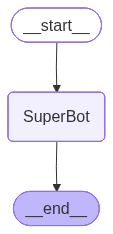

In [10]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile(checkpointer=memory)


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [11]:
## Invocation

config = {"configurable": {"thread_id": "1"}}

graph_builder.invoke({'messages':"Hi,My name is Binod And I like cricket"},config)

{'messages': [HumanMessage(content='Hi,My name is Binod And I like cricket', additional_kwargs={}, response_metadata={}, id='acde757d-b7dd-4fea-a424-f7ea064f7de0'),
  AIMessage(content="Hello Binod! 👋 Nice to meet you. \n\nCricket is such an exciting sport—whether you love the drama of Test matches, the fast‑pace of ODIs, or the thrill of T20s. Do you have a favorite team or player you follow? Or maybe a memorable match that’s stuck with you? I'd love to hear more about your cricket passions!", additional_kwargs={'reasoning_content': 'The user says "Hi,My name is Binod And I like cricket". Probably they want a response greeting them, perhaps ask about cricket preferences. We should respond friendly. No disallowed content. Just chat.'}, response_metadata={'token_usage': {'completion_tokens': 130, 'prompt_tokens': 82, 'total_tokens': 212, 'completion_time': 0.269102587, 'prompt_time': 0.003112608, 'queue_time': 0.048561112, 'total_time': 0.272215195, 'completion_tokens_details': {'reason

#### Streaming The Responses With Stream Method


In [12]:
# Create a thread
config = {"configurable": {"thread_id": "3"}}

for chunk in graph_builder.stream({'messages':"Hi,My name is Binod And I like cricket"},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="Hello Binod! 👋 Great to meet you. \n\nCricket is such an exciting sport—do you have a favorite team or player? Are you more into watching matches, playing in the backyard, or maybe both? I'd love to hear more about what you enjoy about cricket!", additional_kwargs={'reasoning_content': 'We need to respond. The user says "Hi, My name is Binod And I like cricket". Likely a greeting. We should respond friendly, ask about cricket preferences, etc. No policy issues.'}, response_metadata={'token_usage': {'completion_tokens': 109, 'prompt_tokens': 82, 'total_tokens': 191, 'completion_time': 0.233956402, 'prompt_time': 0.003089949, 'queue_time': 0.047680401, 'total_time': 0.237046351, 'completion_tokens_details': {'reasoning_tokens': 43}}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_a28df4bce5', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--c227cef9-091b-4efc-9290-8

In [13]:
for chunk in graph_builder.stream({'messages':"I also like football"},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi,My name is Binod And I like cricket', additional_kwargs={}, response_metadata={}, id='daa4a4a4-e6de-4401-a7b8-2657985aa2ea'), AIMessage(content="Hello Binod! 👋 Great to meet you. \n\nCricket is such an exciting sport—do you have a favorite team or player? Are you more into watching matches, playing in the backyard, or maybe both? I'd love to hear more about what you enjoy about cricket!", additional_kwargs={'reasoning_content': 'We need to respond. The user says "Hi, My name is Binod And I like cricket". Likely a greeting. We should respond friendly, ask about cricket preferences, etc. No policy issues.'}, response_metadata={'token_usage': {'completion_tokens': 109, 'prompt_tokens': 82, 'total_tokens': 191, 'completion_time': 0.233956402, 'prompt_time': 0.003089949, 'queue_time': 0.047680401, 'total_time': 0.237046351, 'completion_tokens_details': {'reasoning_tokens': 43}}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_a28df4bce5'

In [14]:
for chunk in graph_builder.stream({'messages':"I also like football "},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content='That’s a great combo, Binod! 🎉  \nBeing into both cricket and football means you’ve got action to follow all year long. Here’s a quick snapshot of what’s buzzing right now in each sport, plus a few ideas to keep the excitement rolling.\n\n---\n\n## ⚡ Cricket Highlights (May\u202f2025)\n\n| Tournament / Series | What’s Happening | Key Players to Watch |\n|---------------------|------------------|----------------------|\n| **ICC Men’s T20 World Cup 2024‑25** (finals in New\u202fYork) | India beat England in the semis; Australia are the surprise finalists. | Virat\u202fKohli (India), Jos\u202fBermudez (Australia), Shaheen\u202fAfridi (Pakistan) |\n| **Indian Premier League (IPL) 2025** (season just wrapped) | Chennai Super Kings clinched their 5th title; RCB’s young core looks promising. | Ruturaj\u202fGaikwad (CSK), Yashasvi\u202fJaiswal (RCB), Rashid\u202fKhan (RR) |\n| **The Ashes 2025** (England vs Australia) | England leading 2‑1 in the f

In [15]:
for chunk in graph_builder.stream({'messages':"I Love sports "},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi,My name is Binod And I like cricket', additional_kwargs={}, response_metadata={}, id='daa4a4a4-e6de-4401-a7b8-2657985aa2ea'), AIMessage(content="Hello Binod! 👋 Great to meet you. \n\nCricket is such an exciting sport—do you have a favorite team or player? Are you more into watching matches, playing in the backyard, or maybe both? I'd love to hear more about what you enjoy about cricket!", additional_kwargs={'reasoning_content': 'We need to respond. The user says "Hi, My name is Binod And I like cricket". Likely a greeting. We should respond friendly, ask about cricket preferences, etc. No policy issues.'}, response_metadata={'token_usage': {'completion_tokens': 109, 'prompt_tokens': 82, 'total_tokens': 191, 'completion_time': 0.233956402, 'prompt_time': 0.003089949, 'queue_time': 0.047680401, 'total_time': 0.237046351, 'completion_tokens_details': {'reasoning_tokens': 43}}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_a28df4bce5'

#### Streaming The Responses With astream Method

**Streaming tokens**
We often want to stream more than graph state.

In particular, with chat model calls it is common to stream the **tokens** as they are generated.

We can do this using the .astream_events method, which streams back events as they happen inside nodes!

Each event is a dict with a few keys:

- event: This is the type of event that is being emitted.
- name: This is the name of event.
- data: This is the data associated with the event.
- metadata: Contains langgraph_node, the node emitting the event.

In [16]:
config = {"configurable": {"thread_id": "3"}}

async for event in graph_builder.astream_events({"messages":["Hi My name is Binod and I like to play cricket"]},config,version="v2"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': ['Hi My name is Binod and I like to play cricket']}}, 'name': 'LangGraph', 'tags': [], 'run_id': '9ba4a6f8-539b-4798-8b9b-7920b0d05da1', 'metadata': {'thread_id': '3'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hi,My name is Binod And I like cricket', additional_kwargs={}, response_metadata={}, id='daa4a4a4-e6de-4401-a7b8-2657985aa2ea'), AIMessage(content="Hello Binod! 👋 Great to meet you. \n\nCricket is such an exciting sport—do you have a favorite team or player? Are you more into watching matches, playing in the backyard, or maybe both? I'd love to hear more about what you enjoy about cricket!", additional_kwargs={'reasoning_content': 'We need to respond. The user says "Hi, My name is Binod And I like cricket". Likely a greeting. We should respond friendly, ask about cricket preferences, etc. No policy issues.'}, response_metadata={'token_usage': {'completion_tokens':